# Pre-processing exercise

In this exercise you will pre-prcess the [California housing dataset](https://www.kaggle.com/camnugent/california-housing-prices). 


The pre-processing needs to have the next parts: 
- [ ] Basic inspection of the data. 
- [ ] Dealing with missing values (you can choose what to do with them in each case). 
- [ ] Finding outliers and decide what to do with them. 
- [ ] Extract new variables. 
- [ ] Transform all categorical variables into one-hot-encoding variables. 
- [ ] Transform the numerical variables; you can use MinMax, Standarization, boxcox or any other transformation that makes sense. 


In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('precision', 3)


In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
housing = pd.read_csv("housing.csv", header=0, delimiter=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.325,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.301,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.257,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.643,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.846,342200.0,NEAR BAY


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

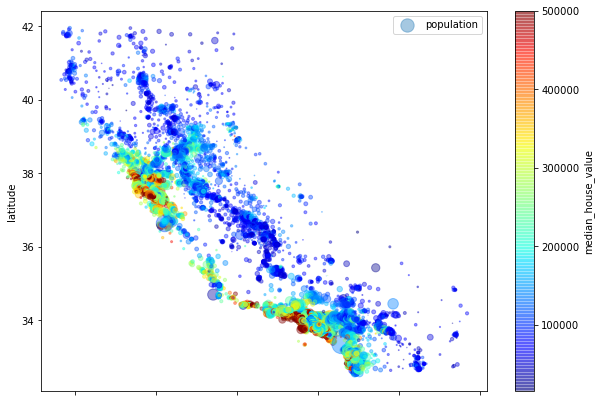

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [34]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.00,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.54,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.33,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.00,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.00,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.00,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.00,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.00,15.000,500001.000


In [35]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [36]:
subset_of_housing = housing.drop(columns=['total_bedrooms','ocean_proximity'])

In [37]:
subset_of_housing.shape
housing.shape

(20640, 8)

(20640, 10)

In [38]:
rows_not_missing = housing.total_bedrooms.notna()
rows_missing = housing.total_bedrooms.isna()
rows_not_missing.sum()
rows_missing.sum()

20433

207

In [39]:
housing_without_missings = subset_of_housing[rows_not_missing]
housing_without_missings.shape

(20433, 8)

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(housing_without_missings, housing.total_bedrooms[rows_not_missing])
imputed_values = knn.predict(subset_of_housing[rows_missing]);

In [50]:
housing.total_bedrooms[rows_missing] = imputed_values

/Users/marias/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<AxesSubplot:>

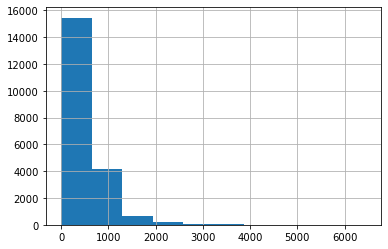

In [52]:
housing.total_bedrooms.hist()